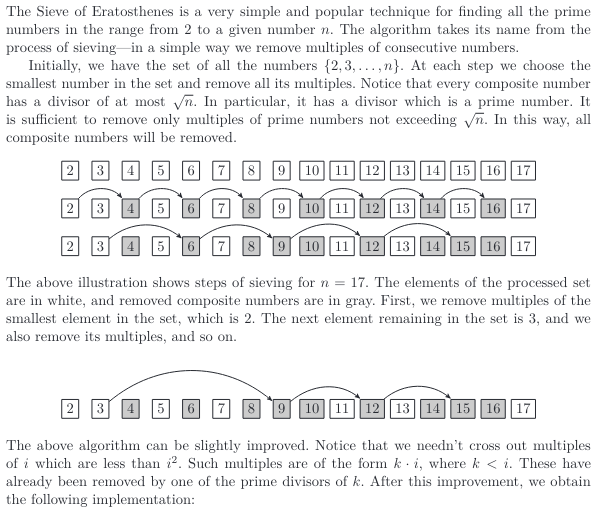

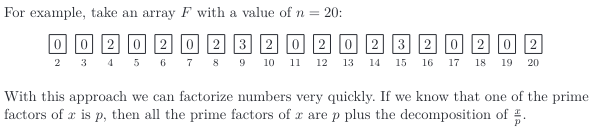

원래 에라토스테네스의 체를 구현할 때, n=2부터 시작해서 n이 소수면 2*n, 3*n, ... 를 날렸는데, 다음 두 가지 아이디어로 시간을 아낄 수 있음.

1. 소수가 아닌 수는 $a \times b$ 로 표현된다. 그런데 $a \times b \le n$ 이므로, $min(a, b) \le \sqrt{n}$ 가 성립된다. 결국, 루프를 $\sqrt{n}$ 이하로만 돌려도 $\sqrt{n} \lt x \le n$ 구간에는 체크되지 않은 소수가 없음을 확신할 수 있다.    
2. 위의 루프에서 소수 $a$를 발견했을 때, $2 \times a$ 부터 찾아가는게 아닌, $a^2$ 부터 찾아가도 된다. $a \times b$ 에서 $a \gt b$인 $b$는 진작에 $a$까지 오기 전에 루프에서 걸렸을 것이고, 이의 배수들도 전부 처리됐을 것이기 때문이다. 

# <span style="color:Salmon">CountNonDivisible</span>

<div class="brinza-task-description">
<p>You are given an array A consisting of N integers.</p>
<p>For each number A[i] such that 0 ≤ i &lt; N, we want to count the number of elements of the array that are not the divisors of A[i]. We say that these elements are non-divisors.</p>
<p>For example, consider integer N = 5 and array A such that:</p>
<tt style="white-space: pre-wrap;">    A[0] = 3
    A[1] = 1
    A[2] = 2
    A[3] = 3
    A[4] = 6</tt>
<p>For the following elements:</p>
<blockquote><ul style="margin: 10px; padding: 0px;"><li>A[0] = 3, the non-divisors are: 2, 6,</li>
<li>A[1] = 1, the non-divisors are: 3, 2, 3, 6,</li>
<li>A[2] = 2, the non-divisors are: 3, 3, 6,</li>
<li>A[3] = 3, the non-divisors are: 2, 6,</li>
<li>A[4] = 6, there aren't any non-divisors.</li>
</ul>
</blockquote><p>Write a function:</p>
<blockquote><p style="font-family: monospace; font-size: 9pt; display: block; white-space: pre-wrap;"><tt>def solution(A)</tt></p></blockquote>
<p>that, given an array A consisting of N integers, returns a sequence of integers representing the amount of non-divisors.</p>
<p>Result array should be returned as an array of integers.</p>
<p>For example, given:</p>
<tt style="white-space: pre-wrap;">    A[0] = 3
    A[1] = 1
    A[2] = 2
    A[3] = 3
    A[4] = 6</tt>
<p>the function should return [2, 4, 3, 2, 0], as explained above.</p>
<p>Write an <b><b>efficient</b></b> algorithm for the following assumptions:</p>
<blockquote><ul style="margin: 10px; padding: 0px;"><li>N is an integer within the range [<span class="number">1</span>..<span class="number">50,000</span>];</li>
<li>each element of array A is an integer within the range [<span class="number">1</span>..<span class="number"><tt style="white-space: pre-wrap;">2 * N</tt></span>].</li>
</ul>
</blockquote></div>

In [2]:
## 목록 안에 각 숫자의 등장횟수를 먼저 찾고, 각 수 돌아가면서 O(root(m))으로 탐색한다.
def solution(A):
    cache = {}
    element_counts = {}
    answer = []

    for a in A:
        element_counts[a] = element_counts.get(a, 0)+1

    for a in A:
        if a in cache:
            answer.append(cache[a])
            continue

        count = 0
        for i in range(1, int(a**0.5)+1):
            if a%i == 0:
                count += element_counts.get(i, 0)
                count += element_counts.get(a//i, 0)
        if a**0.5 == int(a**0.5):
            count -= element_counts.get(int(a**0.5), 0)

        answer.append(len(A)-count)
        cache[a] = answer[-1]

    return answer

solution([3,1,2,3,6])

[2, 4, 3, 2, 0]

# <span style="color:Salmon">CountSemiprimes</span>

<div class="brinza-task-description">
<p>A <i>prime</i> is a positive integer X that has exactly two distinct divisors: 1 and X. The first few prime integers are 2, 3, 5, 7, 11 and 13.</p>
<p>A <i>semiprime</i> is a natural number that is the product of two (not necessarily distinct) prime numbers. The first few semiprimes are 4, 6, 9, 10, 14, 15, 21, 22, 25, 26.</p>
<p>You are given two non-empty arrays P and Q, each consisting of M integers. These arrays represent queries about the number of semiprimes within specified ranges.</p>
<p>Query K requires you to find the number of semiprimes within the range (P[K], Q[K]), where 1 ≤ P[K] ≤ Q[K] ≤ N.</p>
<p>For example, consider an integer N = 26 and arrays P, Q such that:</p>
<tt style="white-space: pre-wrap;">    P[0] = 1    Q[0] = 26
    P[1] = 4    Q[1] = 10
    P[2] = 16   Q[2] = 20</tt>
<p>The number of semiprimes within each of these ranges is as follows:</p>
<blockquote><ul style="margin: 10px; padding: 0px;"><li>(1, 26) is 10,</li>
<li>(4, 10) is 4,</li>
<li>(16, 20) is 0.</li>
</ul>
</blockquote><p>Write a function:</p>
<blockquote><p style="font-family: monospace; font-size: 9pt; display: block; white-space: pre-wrap;"><tt>def solution(N, P, Q)</tt></p></blockquote>
<p>that, given an integer N and two non-empty arrays P and Q consisting of M integers, returns an array consisting of M elements specifying the consecutive answers to all the queries.</p>
<p>For example, given an integer N = 26 and arrays P, Q such that:</p>
<tt style="white-space: pre-wrap;">    P[0] = 1    Q[0] = 26
    P[1] = 4    Q[1] = 10
    P[2] = 16   Q[2] = 20</tt>
<p>the function should return the values [10, 4, 0], as explained above.</p>
<p>Write an <b><b>efficient</b></b> algorithm for the following assumptions:</p>
<blockquote><ul style="margin: 10px; padding: 0px;"><li>N is an integer within the range [<span class="number">1</span>..<span class="number">50,000</span>];</li>
<li>M is an integer within the range [<span class="number">1</span>..<span class="number">30,000</span>];</li>
<li>each element of arrays P and Q is an integer within the range [<span class="number">1</span>..<span class="number">N</span>];</li>
<li>P[i] ≤ Q[i].</li>
</ul>
</blockquote></div>

In [ ]:
# prime 을 N/2까지 구하고, subprime 을 루프돌려서 구한다.
# list로 prime을 구해두면 나중에 루프돌 때 복잡해질 것 같다.
# 먼저 모든 수를 set에 두고, 아직 set에 남아있으면 x^2 부터 루프돌리며 set에서 빼내자.
def solution(N, P, Q):
    prime_set = {i for i in range(2, N//2+1)}
    for i in range(2, int((N//2+1)**0.5)+1):
        if i in prime_set:
            for j in range(i**2, N//2+1, i):
                prime_set.discard(j)
    prime_list = list(prime_set)

    subprime_set = set()
    for idx_1, val_1 in enumerate(prime_list):
        for idx_2 in range(idx_1, len(prime_list)):
            val = val_1*prime_list[idx_2]
            if val>N:
                break
            subprime_set.add(val)

    partial_subprimes = [0 for _ in range(N+1)]
    partial = 0
    for idx in range(N+1):
        if idx in subprime_set:
            partial += 1
        partial_subprimes[idx] = partial

    answer = []
    for p, q in zip(P, Q):
        if p == 0:
            p += 1
        answer.append(partial_subprimes[q]-partial_subprimes[p-1])
    return answer